## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
# os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [5]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [6]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [13]:
def build_mlp(input_shape, output_units = 10, num_neurons = [512,256,128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation='relu', name = 'hidden_layer'+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation='relu', name = 'hidden_layer'+str(i+1))(x)
    out = keras.layers.Dense(units=output_units, activation='softmax', name ='output')(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])

    """Code Here
    建立你的神經網路
    """
    
    return model

In [18]:
"""Code Here
設定超參數
"""
learning_rate = 1e-3
epochs = 30
batch_size = 256
momentum = [0.01,0.3,0.5,0.7,0.9]



In [19]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for m in momentum:
    keras.backend.clear_session()
    print('experiment with momentum = %.2f'%(m))
    model = build_mlp(input_shape = x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=learning_rate, nesterov=True, momentum=m)
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer = optimizer)
    
    model.fit(x_train, y_train, epochs = epochs, batch_size=batch_size,
              validation_data=(x_test,y_test),shuffle=True)
    
    train_loss = model.history.history['loss']
    valid_loss = model.history.history['val_loss']
    train_acc = model.history.history['acc']
    valid_acc = model.history.history['val_acc']
    
    exp_name_tag = 'exp-momentum-%s'%str(m)
    results[exp_name_tag] = {'train-loss':train_loss,
                             'valid-loss':valid_loss,
                             'train-acc':train_acc,
                             'valid-acc':valid_acc}
    
    


experiment with momentum = 0.01
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule a

50000/50000 [==============================] - 2s 40us/step - loss: 1.8561 - acc: 0.3530 - val_loss: 1.8540 - val_acc: 0.3559
Epoch 13/30
50000/50000 [==============================] - 2s 40us/step - loss: 1.8430 - acc: 0.3584 - val_loss: 1.8407 - val_acc: 0.3613
Epoch 14/30
50000/50000 [==============================] - 2s 40us/step - loss: 1.8307 - acc: 0.3618 - val_loss: 1.8299 - val_acc: 0.3647
Epoch 15/30
50000/50000 [==============================] - 2s 40us/step - loss: 1.8195 - acc: 0.3662 - val_loss: 1.8182 - val_acc: 0.3690
Epoch 16/30
50000/50000 [==============================] - 2s 40us/step - loss: 1.8089 - acc: 0.3689 - val_loss: 1.8096 - val_acc: 0.3699
Epoch 17/30
50000/50000 [==============================] - 2s 40us/step - loss: 1.7996 - acc: 0.3739 - val_loss: 1.8019 - val_acc: 0.3753
Epoch 18/30
50000/50000 [==============================] - 2s 40us/step - loss: 1.7903 - acc: 0.3758 - val_loss: 1.7906 - val_acc: 0.3810
Epoch 19/30
50000/50000 [=====================

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 2s 44us/step - loss: 2.1985 - acc: 0.2077 - val_loss: 2.1017 - val_acc: 0.2611
Epoch 2/30
50000/50000 [==============================] - 2s 40us/step - loss: 2.0426 - acc: 0.2874 - val_loss: 1.9921 - val_acc: 0.3071
Epoch 3/30
50000/50000 [==============================] - 2s 40us/step - loss: 1.9595 - acc: 0.3138 - val_loss: 1.9301 - val_acc: 0.3176
Epoch 4/30
50000/50000 [==============================] - 2s 40us/step - loss: 1.9080 - acc: 0.3335 - val_loss: 1.8866 - val_acc: 0.3381
Epoch 5/30
50000/50000 [==============================] - 2s 40us/step - loss: 1.8711 - acc: 0.3451 - val_loss: 1.8578 - val_acc: 0.3454
Epoch 6/30
50000/50000 [==============================] - 2s 40us/step - loss: 1.8430 - acc: 0.3547 - val_loss: 1.8322 - val_acc: 0.3614
Epoch 7/30
50000/50000 [==============================] - 2s 40us/step - loss: 1.8192 - acc: 0.3646 - val_loss: 1.8116 - val_acc

50000/50000 [==============================] - 2s 40us/step - loss: 1.3988 - acc: 0.5099 - val_loss: 1.4597 - val_acc: 0.4823
Epoch 23/30
50000/50000 [==============================] - 2s 40us/step - loss: 1.3873 - acc: 0.5132 - val_loss: 1.4511 - val_acc: 0.4865
Epoch 24/30
50000/50000 [==============================] - 2s 40us/step - loss: 1.3740 - acc: 0.5171 - val_loss: 1.4724 - val_acc: 0.4778
Epoch 25/30
50000/50000 [==============================] - 2s 40us/step - loss: 1.3634 - acc: 0.5213 - val_loss: 1.4320 - val_acc: 0.4934
Epoch 26/30
50000/50000 [==============================] - 2s 40us/step - loss: 1.3513 - acc: 0.5259 - val_loss: 1.4170 - val_acc: 0.5003
Epoch 27/30
50000/50000 [==============================] - 2s 40us/step - loss: 1.3413 - acc: 0.5284 - val_loss: 1.4182 - val_acc: 0.4987
Epoch 28/30
50000/50000 [==============================] - 2s 40us/step - loss: 1.3298 - acc: 0.5335 - val_loss: 1.4652 - val_acc: 0.4827
Epoch 29/30
50000/50000 [=====================

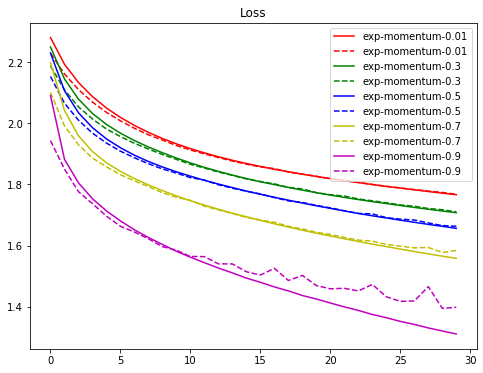

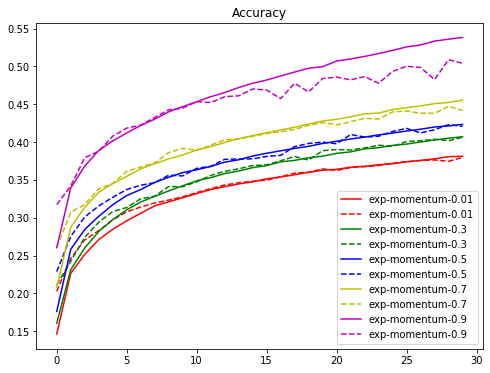

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m"]
plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

experiment with nersterov = True
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [========

50000/50000 [==============================] - 2s 38us/step - loss: 1.5074 - acc: 0.4731 - val_loss: 1.5463 - val_acc: 0.4486
Epoch 15/30
50000/50000 [==============================] - 2s 39us/step - loss: 1.4937 - acc: 0.4764 - val_loss: 1.5172 - val_acc: 0.4616
Epoch 16/30
50000/50000 [==============================] - 2s 38us/step - loss: 1.4783 - acc: 0.4829 - val_loss: 1.5048 - val_acc: 0.4704
Epoch 17/30
50000/50000 [==============================] - 2s 38us/step - loss: 1.4640 - acc: 0.4886 - val_loss: 1.4937 - val_acc: 0.4722
Epoch 18/30
50000/50000 [==============================] - 2s 38us/step - loss: 1.4509 - acc: 0.4926 - val_loss: 1.4892 - val_acc: 0.4718
Epoch 19/30
50000/50000 [==============================] - 2s 38us/step - loss: 1.4349 - acc: 0.4977 - val_loss: 1.4768 - val_acc: 0.4804
Epoch 20/30
50000/50000 [==============================] - 2s 38us/step - loss: 1.4238 - acc: 0.5019 - val_loss: 1.4626 - val_acc: 0.4781
Epoch 21/30
50000/50000 [=====================

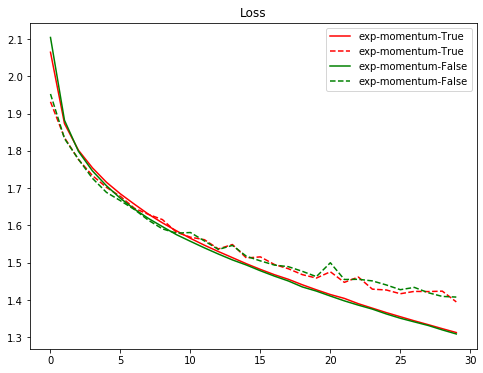

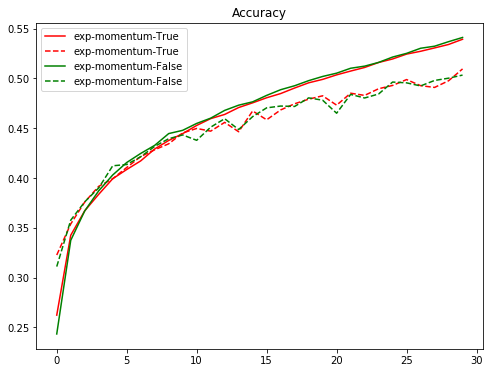

In [23]:
results_2 = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
nesterovs = [True,False]
for n in nesterovs:
    keras.backend.clear_session()
    print('experiment with nersterov = %s'%str(n))
    model = build_mlp(input_shape = x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=learning_rate, nesterov=nesterovs, momentum=0.9)
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer = optimizer)
    
    model.fit(x_train, y_train, epochs = epochs, batch_size=batch_size,
              validation_data=(x_test,y_test),shuffle=True)
    
    train_loss = model.history.history['loss']
    valid_loss = model.history.history['val_loss']
    train_acc = model.history.history['acc']
    valid_acc = model.history.history['val_acc']
    
    exp_name_tag = 'exp-momentum-%s'%str(n)
    results_2[exp_name_tag] = {'train-loss':train_loss,
                             'valid-loss':valid_loss,
                             'train-acc':train_acc,
                             'valid-acc':valid_acc}
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g"]
plt.figure(figsize=(8,6))
for i, cond in enumerate(results_2.keys()):
    plt.plot(range(len(results_2[cond]['train-loss'])),results_2[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results_2[cond]['valid-loss'])),results_2[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results_2.keys()):
    plt.plot(range(len(results_2[cond]['train-acc'])),results_2[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results_2[cond]['valid-acc'])),results_2[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()    
    

In [24]:
print(results_2.keys())

dict_keys(['exp-momentum-True', 'exp-momentum-False'])
